In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(5)
c = ClassicalRegister(4)

In [22]:
circuit = QuantumCircuit(q,c)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.x(4)
circuit.h(4)

for i in range(1):
    # oracle with jey set to 1111
#     circuit.mct(list(range(4)), 4)
    # oracle with key set to 0011, 0111. 1011, 1111
    circuit.ccx(0, 1, 4)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.x(3)
    circuit.h(3)
    circuit.mct(list(range(3)), 3)
    circuit.h(3)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.x(3)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)

circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.measure(q[3], c[3])

circuit.draw()

┌───┐          ┌───┐┌───┐     ┌───┐┌───┐     ┌─┐         
q0_0: ┤ H ├───────■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─────┤M├─────────
      ├───┤       │  ├───┤├───┤  │  ├───┤├───┤     └╥┘┌─┐      
q0_1: ┤ H ├───────■──┤ H ├┤ X ├──■──┤ X ├┤ H ├──────╫─┤M├──────
      ├───┤┌───┐  │  ├───┤└───┘  │  ├───┤├───┤      ║ └╥┘┌─┐   
q0_2: ┤ H ├┤ H ├──┼──┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
      ├───┤├───┤  │  ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q0_3: ┤ H ├┤ H ├──┼──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
      ├───┤├───┤┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
q0_4: ┤ X ├┤ H ├┤ X ├───────────────────────────────╫──╫──╫──╫─
      └───┘└───┘└───┘                               ║  ║  ║  ║ 
c0: 4/══════════════════════════════════════════════╩══╩══╩══╩═
                                                    0  1  2  3

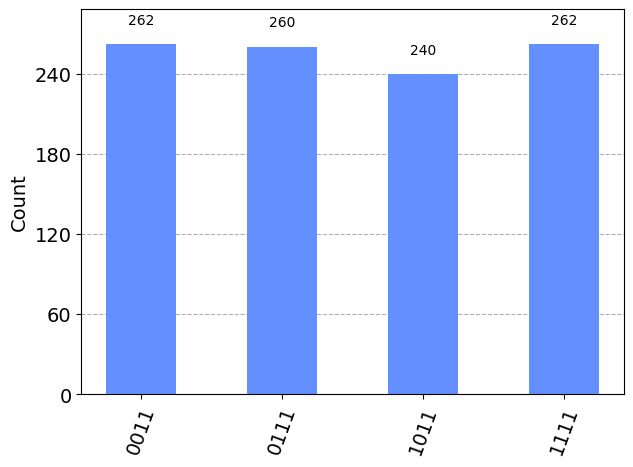

In [23]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)